# Optimization

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def VisualInspection(ax, f, a, b, dx, **kwargs):
    x = np.arange(a,b+dx,dx)
    y = f(x)
    plt.plot(x, y, **kwargs)
    plt.xlabel('x')
    plt.ylabel('y')

## Question 1

Implement the Bracketting algorithm and use it to bracket one minima of the following functions in [0,5]

- sin(3x)+cos(x)
- x^4 + (3-x)^3
- x^3 - 5*(x-4)^3
- 1/(2-cos(2x)+0.2sin(2+8x))

For each case, do:

- Visualy check that you found a minimum of the function 
- Is it a local or a global minimum over the domain ?
- Try different starting point and see if you always find the same minimum

How does the root finding changes with the step-size (h) expanding rule between iteration ? (hint, try to change c)


In [2]:
def bracket(f,x1,h,c = 1.618033989 ):
    f1 = f(x1)
    x2 = x1 + h; f2 = f(x2)
  # Determine downhill direction and change sign of h if needed
    if f2 > f1:
        h = -h
        x2 = x1 + h; f2 = f(x2)
      # Check if minimum between x1 - h and x1 + h
        if f2 > f1: return x2,x1 - h 
  # Search loop
    for i in range (1000):    
        h = c*h
        x3 = x2 + h; f3 = f(x3)
        if f3 > f2: return x1,x3
        x1 = x2; x2 = x3
        f1 = f2; f2 = f3
    print("Bracket did not find a mimimum")

bracketWidth= 0.760131557070054
bracketWidth= 1.2299186954508405
bracketWidth= 0.29034441878962136
bracketWidth= 0.760131557070054


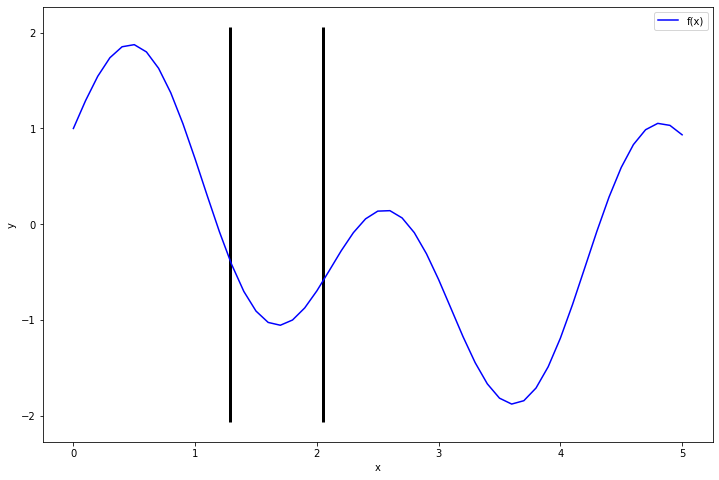

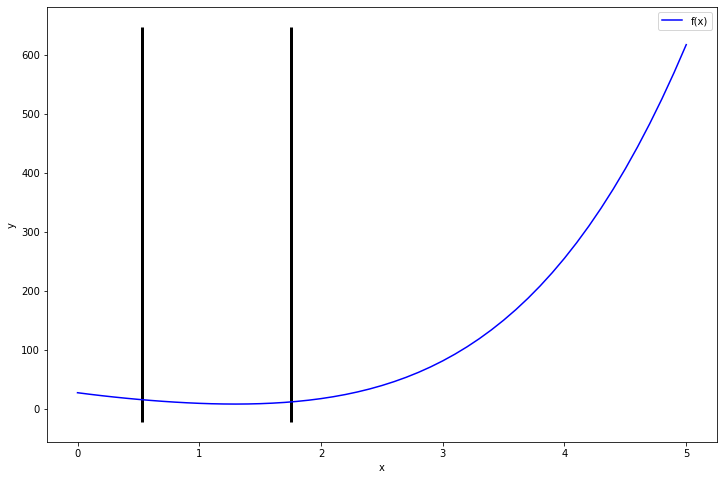

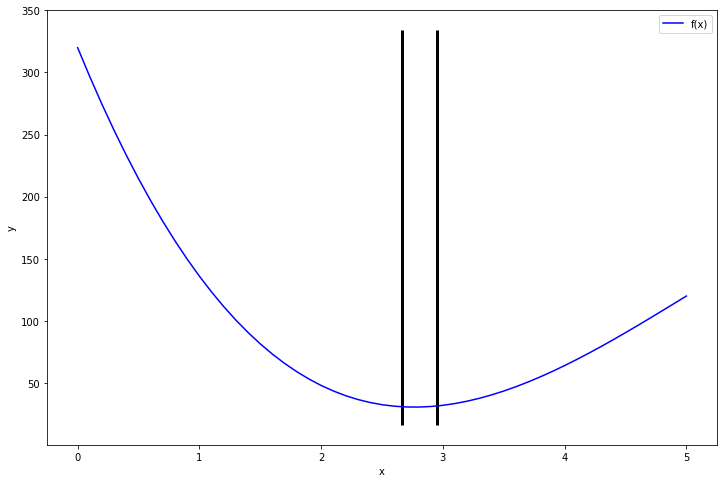

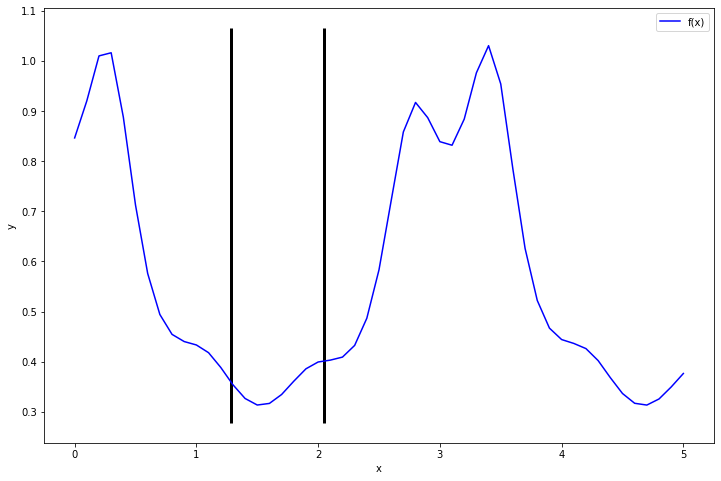

In [3]:
def f1(x): return math.sin(3*x)+math.cos(x)
def f2(x): return x**4 + (3-x)**3
def f3(x): return x**3 - 5*(x-4)**3
def f4(x): return 1/(2-math.cos(2*x)+0.2*math.sin(2+8*x))

f1 = np.vectorize(f1)
f2 = np.vectorize(f2)
f3 = np.vectorize(f3)
f4 = np.vectorize(f4)

for f in [f1,f2,f3,f4]:    
    fig, ax = plt.subplots(figsize=(12, 8))
    VisualInspection(ax, f, 0, 5, 0.1, color="blue", linestyle="-", label="f(x)")
    ax.legend()
    
    xStart = 2.5
    minimum_bracket = bracket(f, xStart, h=0.01)
    if(minimum_bracket[0]<0 or minimum_bracket[1]>5.0): 
        print("NoMinimum found on the domain")
    else:
        ax.vlines(minimum_bracket, ax.get_ylim()[0], ax.get_ylim()[1], linewidth=3, color="black")
        print("bracketWidth=",np.abs(minimum_bracket[1]-minimum_bracket[0]))
    

## Question 2

Implement the Golden-search algorithm and use it to localize one minima of the Q1 functions in [0,5]

For each case, do:

- Visualy check that you found a minimum of the function 


In [20]:
def search(f,a,b,tol=1.0e-9):
    nIter = int(np.ceil(-2.078087*np.log(tol/abs(b-a))))
    R = 0.618033989
    C = 1.0 - R
  # First telescoping
    h = b-a
    x1 = R*a + C*b; x2 = C*a + R*b
    x1 = b-R*h; x2 = a+R*h
    f1 = f(x1); f2 = f(x2)
  # Main loop
    for i in range(nIter):
        if f1 > f2:
            a = x1
            h = b-a
            x1 = x2; f1 = f2
            x2 = a + R*h; f2 = f(x2)
        else:
            b = x2
            h = b-a
            x2 = x1; f2 = f1
            x1 = b-R*h; f1 = f(x1)
    if f1 < f2: return x1,f1
    else: return x2,f2

bracketWidth= 0.760131557070054
1.6833301564266416
bracketWidth= 1.2299186954508405
1.2961224012197423
bracketWidth= 0.29034441878962136
2.763932008064325
bracketWidth= 0.760131557070054
1.529925913608177


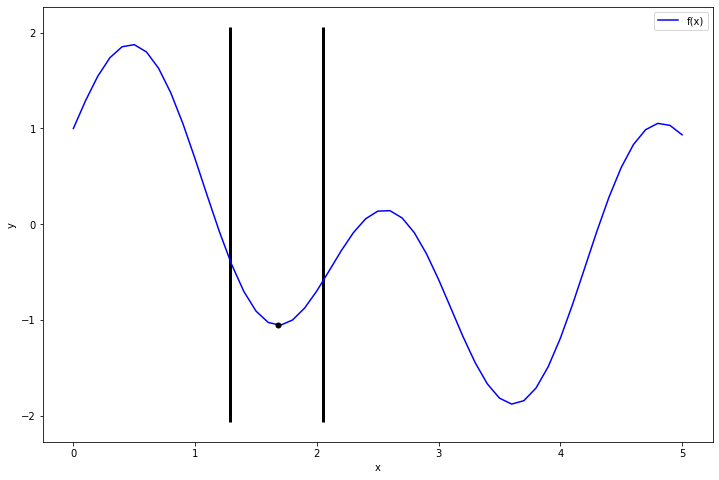

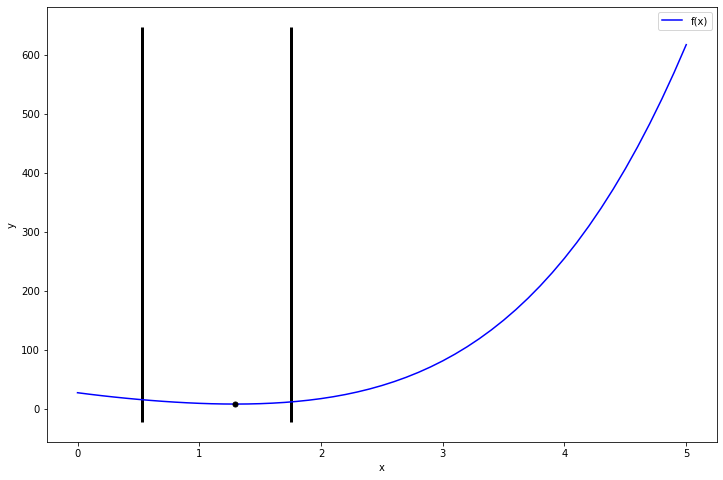

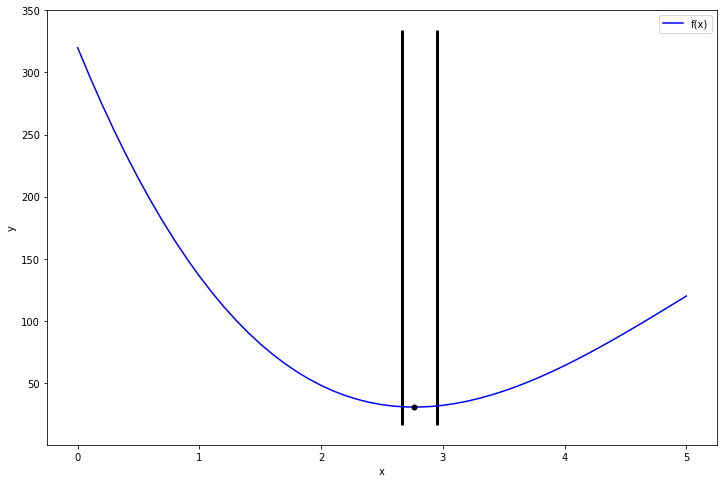

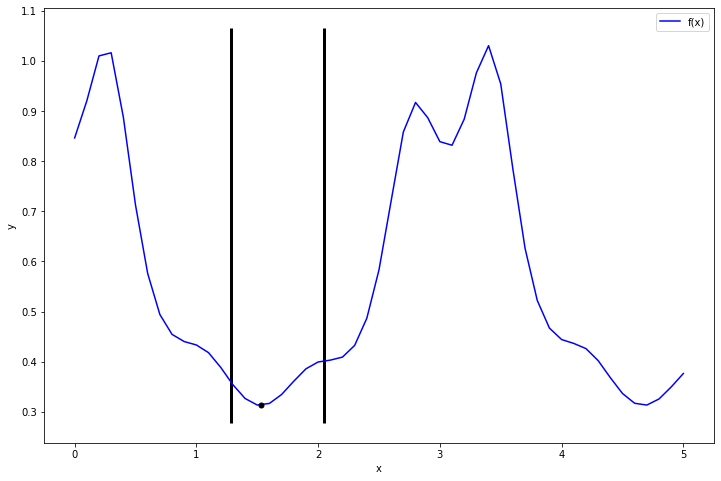

In [21]:
for f in [f1,f2,f3,f4]:    
    fig, ax = plt.subplots(figsize=(12, 8))
    VisualInspection(ax, f, 0, 5, 0.1, color="blue", linestyle="-", label="f(x)")
    ax.legend()
    
    xStart = 2.5
    minimum_bracket = bracket(f, xStart, h=0.01)
    if(minimum_bracket[0]<0 or minimum_bracket[1]>5.0): 
        print("NoMinimum found on the domain")
    else:
        ax.vlines(minimum_bracket, ax.get_ylim()[0], ax.get_ylim()[1], linewidth=3, color="black")
        print("bracketWidth=",np.abs(minimum_bracket[1]-minimum_bracket[0]))

        minimum, fminimum = search(f, minimum_bracket[0], minimum_bracket[1])
        ax.plot(minimum, fminimum, "ok", markersize=5)
        print(minimum)
        

## Question 3

    
The Lennard-Jones potential between two molecules is

$\Large V = 4\epsilon \left[ (\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^{6} \right] $

where $\epsilon$ and $\sigma$ are constants, and $r$ is the distance between the molecules.

- a) Derivate the function to find its minimum analytically
- b) Use the goldSearch algorithm to find $\sigma /r$ that minimizes the potential.
- c) Where is the optimal point if we had the constraints $0.5 \leq \sigma /r \leq 0.7 $

Hint: you can use epsilon=1, as it won't change the minimum of the function, and you can visually look at the function in the domain [0,1.5]

bracketWidth= 0.46978713811805717
0.8908987168793501 -1.0
bracketWidth= 0.46978713811805717
0.8908987168793501 -1.0
0.6999999996661517 -0.41523085016622374


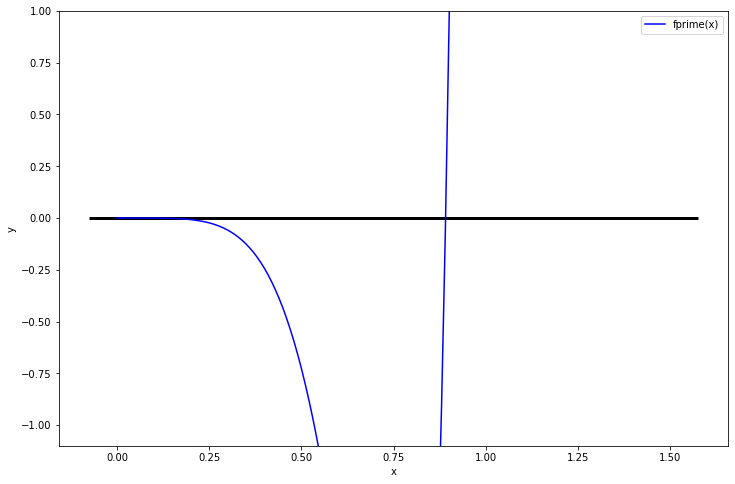

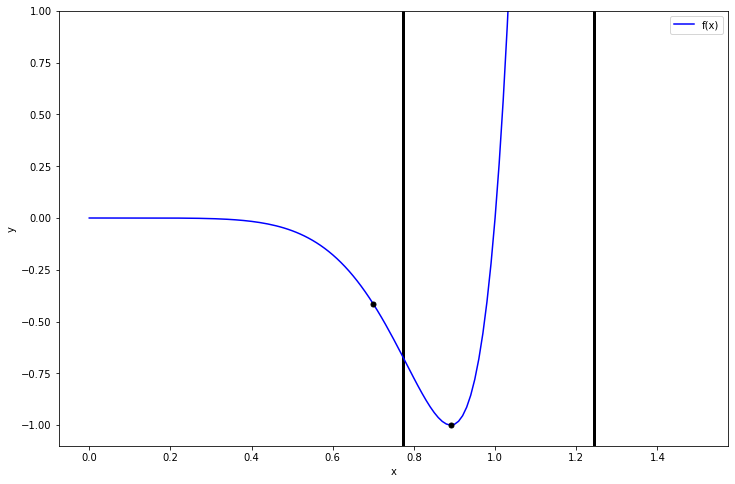

In [6]:
epsilon = 1.0
def f(x): return 4*epsilon * ( x**12 - x**6 )  
def fprime(x): return 4*epsilon * ( 12*x**11 - 6*x**5 )  

fig, ax = plt.subplots(figsize=(12, 8))
VisualInspection(ax, fprime, 0, 1.5, 0.01, color="blue", linestyle="-", label="fprime(x)")
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], linewidth=3, color="black")
ax.set_ylim(-1.1, 1)
ax.legend()


fig, ax = plt.subplots(figsize=(12, 8))
VisualInspection(ax, f, 0, 1.5, 0.01, color="blue", linestyle="-", label="f(x)")
ax.set_ylim(-1.1, 1)
ax.legend()
    
    
    
xStart = 0.5
minimum_bracket = bracket(f, xStart, h=0.01)
if(minimum_bracket[0]<0 or minimum_bracket[1]>5.0): 
    print("NoMinimum found on the domain")
else:
    ax.vlines(minimum_bracket, ax.get_ylim()[0], ax.get_ylim()[1], linewidth=3, color="black")
    print("bracketWidth=",np.abs(minimum_bracket[1]-minimum_bracket[0]))

    minimum, fminimum = search(f, minimum_bracket[0], minimum_bracket[1])
    ax.plot(minimum, fminimum, "ok", markersize=5)
    print(minimum, fminimum)
    
xStart = 0.5
minimum_bracket = bracket(f, xStart, h=0.01, c = 1.618033989)
if(minimum_bracket[0]<0 or minimum_bracket[1]>5.0): 
    print("No Minimum found on the domain")
else:
    print("bracketWidth=",np.abs(minimum_bracket[1]-minimum_bracket[0]))
    minimum, fminimum = search(f, minimum_bracket[0], minimum_bracket[1])
    print(minimum, fminimum)
    
minimum, fminimum = search(f, 0.5, 0.7)
ax.plot(minimum, fminimum, "ok", markersize=5)
print(minimum, fminimum)
        

## Question 4
    
The powell and simplex downhill algorithms are given to you in the next cell (no need to implement them).
Use these algorithms to solve the following problems:
    
- a) Find the minimum of the function $F(x, y) = 6x^2 + y^3 + xy$ in $y \geq 0$. Verify the result analytically.
- b) Find the minimum of the function $F(x, y) = 6x^2 + y^3 + xy$ in $y \geq -2$. Verify the result analytically.


Hint: carefully chose the values of lambda (penalty scale factor)

In [7]:
def powell(F,x,h=0.1,tol=1.0e-6, sequences=None):
    
    def f(s): return F(x + s*v)    # F in direction of v

    if(sequences is not None):sequences+=[x.copy()]
    n = len(x)                     # Number of design variables
    df = np.zeros(n)               # Decreases of F stored here
    u = np.identity(n)             # Vectors v stored here by rows
    for j in range(30):            # Allow for 30 cycles:
        
        xOld = x.copy()            # Save starting point
        fOld = F(xOld)
      # First n line searches record decreases of F
        for i in range(n):
            v = u[i]
            a,b = bracket(f,0.0,h)
            s,fMin = search(f,a,b)
            df[i] = fOld - fMin
            fOld = fMin
            x = x + s*v
      # Last line search in the cycle    
        v = x - xOld
        a,b = bracket(f,0.0,h)
        s,fLast = search(f,a,b)
        x = x + s*v
        if(sequences is not None):sequences+=[x.copy()]
      # Check for convergence
        if math.sqrt(np.dot(x-xOld,x-xOld)/n) < tol: return x,j+1
      # Identify biggest decrease & update search directions
        iMax = np.argmax(df)
        for i in range(iMax,n-1):
            u[i] = u[i+1]
        u[n-1] = v
    print("Powell did not converge")
        
    

## module downhill
''' x = downhill(F,xStart,side=0.1,tol=1.0e-6)
    Downhill simplex method for minimizing the user-supplied
    scalar function F(x) with respect to the vector x.
    xStart = starting vector x.
    side   = side length of the starting simplex (default is 0.1)
'''

def downhill(F,xStart,side=0.1,tol=1.0e-6, sequences=None):
    n = len(xStart)                 # Number of variables
    x = np.zeros((n+1,n)) 
    f = np.zeros(n+1)
    
  # Generate starting simplex
    x[0] = xStart
    for i in range(1,n+1):
        x[i] = xStart
        x[i,i-1] = xStart[i-1] + side        
  # Compute values of F at the vertices of the simplex     
    for i in range(n+1): f[i] = F(x[i])

        
  # Main loop
    for k in range(500):
        if(sequences is not None):
            sequences+=[x.copy()]
        
      # Find highest and lowest vertices
        iLo = np.argmin(f)
        iHi = np.argmax(f)       
      # Compute the move vector d
        d = (-(n+1)*x[iHi] + np.sum(x,axis=0))/n
      # Check for convergence
        if math.sqrt(np.dot(d,d)/n) < tol: return x[iLo]
        
      # Try reflection
        xNew = x[iHi] + 2.0*d              
        fNew = F(xNew)        
        if fNew <= f[iLo]:        # Accept reflection 
            x[iHi] = xNew
            f[iHi] = fNew
          # Try expanding the reflection
            xNew = x[iHi] + d               
            fNew = F(xNew)
            if fNew <= f[iLo]:    # Accept expansion
                x[iHi] = xNew
                f[iHi] = fNew
        else:
          # Try reflection again
            if fNew <= f[iHi]:    # Accept reflection
                x[iHi] = xNew
                f[iHi] = fNew
            else:
              # Try contraction
                xNew = x[iHi] + 0.5*d
                fNew = F(xNew)
                if fNew <= f[iHi]: # Accept contraction
                    x[iHi] = xNew
                    f[iHi] = fNew
                else:
                  # Use shrinkage
                    for i in range(len(x)):
                        if i != iLo:
                            x[i] = (x[i] - x[iLo])*0.5
                            f[i] = F(x[i])
    print("Too many iterations in downhill")
    return x[iLo]    

RESULT WITH POWELL:
x = [-0.00231481  0.02777778]
F(x) = -1.0716735253772292e-05
Number of cycles = 8
y= -0.002314814855795683
Penalty= 0.0
RESULT WITH DOWNHILL SIMPLEX:
x = [-0.00231478  0.027777  ]
F(x) = -1.0716735222831859e-05
Number of cycles = 48
y= -0.0023147820937575647
Penalty= 0.0


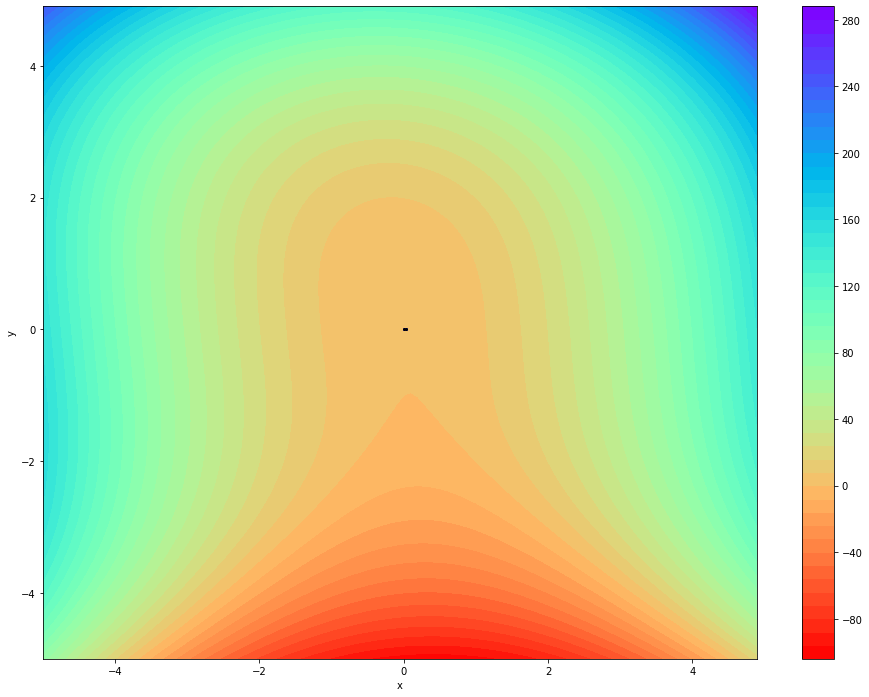

In [8]:

def F(X):   
    x = X[0]
    y = X[1]
    return 6*x**2 + y**3 +x*y

def Penalty(X):
    x = X[0]
    y = X[1]
    lam = 1.0
    c = np.minimum(0,y) # Constraint function
    return lam*c**2

def Fstar(X):    
    return F(X) + Penalty(X)


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

#show the surface
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Fstar(np.array([X,Y]))

ax.cla() #clear axes    
ax.set_xlabel('x')
ax.set_ylabel('y')    
cs = ax.contourf(X, Y, Z, 50, cmap="rainbow_r")    
cbar = fig.colorbar(cs)


XStart = np.array([0, 0])


print("RESULT WITH POWELL:")

sequences = []
XMin_PW = powell(Fstar,XStart, sequences=sequences)
XMin_PW = XMin_PW[0]
sequences = np.array(sequences)

print("x =",XMin_PW)
print("F(x) =",F(XMin_PW))
print("Number of cycles =",sequences.shape[0])
print("y=", XMin_PW[0])
print("Penalty=", Penalty(XMin_PW))
ax.plot([XMin_PW], [F(XMin_PW)], "ob", markersize=2)

print("RESULT WITH DOWNHILL SIMPLEX:")

sequences = []
XMin_DH = downhill(Fstar,XStart, sequences=sequences)
sequences = np.array(sequences)

print("x =",XMin_DH)
print("F(x) =",F(XMin_DH))
print("Number of cycles =",sequences.shape[0])
print("y=", XMin_DH[0])
print("Penalty=", Penalty(XMin_DH))
ax.plot([XMin_DH], [F(XMin_DH)], "ok", markersize=2)

RESULT WITH POWELL:
x = [ 0.16667173 -2.00006084]
F(x) = -8.167406872448568
Number of cycles = 4
y= 0.16667172672614514
Penalty= 0.000370113977517577
RESULT WITH DOWNHILL SIMPLEX:
x = [ 0.10935967 -2.00006129]
F(x) = -8.14770431250094
Number of cycles = 59
y= 0.10935967003251985
Penalty= 0.0003756381305831966


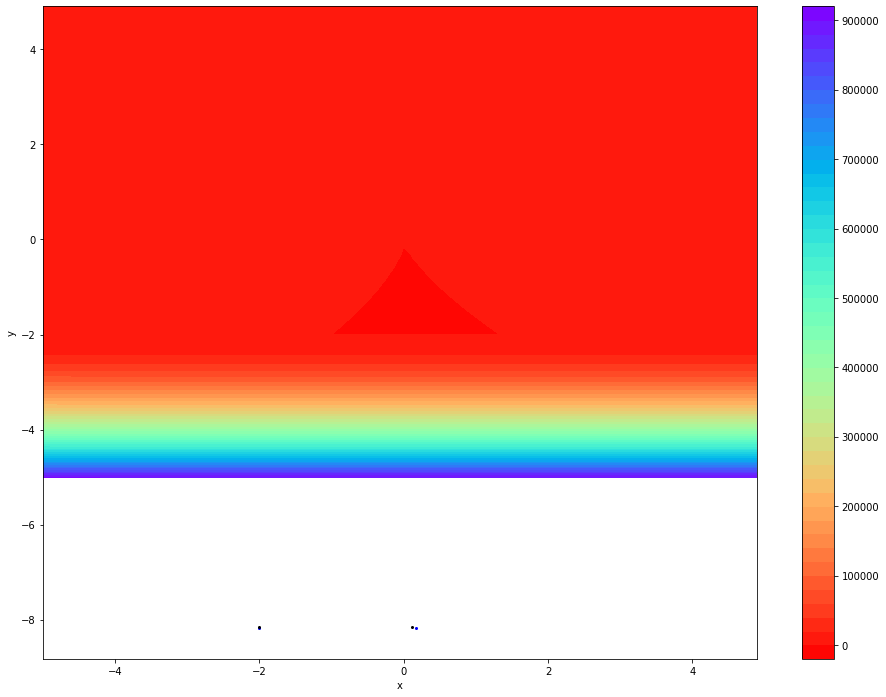

In [9]:

def F(X):   
    x = X[0]
    y = X[1]
    return 6*x**2 + y**3 +x*y

def Penalty(X):
    x = X[0]
    y = X[1]
    lam = 100000.0
    c = np.minimum(0,y-(-2)) # Constraint function
    return lam*c**2

def Fstar(X):    
    return F(X) + Penalty(X)


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

#show the surface
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Fstar(np.array([X,Y]))

ax.cla() #clear axes    
ax.set_xlabel('x')
ax.set_ylabel('y')    
cs = ax.contourf(X, Y, Z, 50, cmap="rainbow_r")    
cbar = fig.colorbar(cs)

XStart = np.array([0, 0])


print("RESULT WITH POWELL:")

sequences = []
XMin_PW = powell(Fstar,XStart, sequences=sequences)
XMin_PW = XMin_PW[0]
sequences = np.array(sequences)

print("x =",XMin_PW)
print("F(x) =",F(XMin_PW))
print("Number of cycles =",sequences.shape[0])
print("y=", XMin_PW[0])
print("Penalty=", Penalty(XMin_PW))
ax.plot([XMin_PW], [F(XMin_PW)], "ob", markersize=2)

print("RESULT WITH DOWNHILL SIMPLEX:")

sequences = []
XMin_DH = downhill(Fstar,XStart, sequences=sequences)
sequences = np.array(sequences)

print("x =",XMin_DH)
print("F(x) =",F(XMin_DH))
print("Number of cycles =",sequences.shape[0])
print("y=", XMin_DH[0])
print("Penalty=", Penalty(XMin_DH))
ax.plot([XMin_DH], [F(XMin_DH)], "ok", markersize=2)

## Question 5

Implement the gradient descent algorithm and use it to solve the problems of question  4

Hint: compute the derivatives of Fstar using central diff approximation

In [10]:
import numpy as np

eps = 10**-9

def F(x,y): return 6*x**2 + y**3 + x*y
def Fstar(x,y): return F(x,y) + Penalty(x,y)
def dF_x(x,y,eps): return (Fstar(x+eps,y) - Fstar(x-eps,y))/(2*eps)
def dF_y(x,y,eps): return (Fstar(x,y+eps) - Fstar(x,y-eps))/(2*eps)
def gradF(x,y,eps): return np.array((dF_x(x,y,eps),dF_y(x,y,eps)))

def Penalty(x,y):
    lam = 100.0
    c = np.minimum(0,y) # Constraint function
    return lam*c**2

def gradient_descent(eta,Fstar,gradF,xs=np.array((1,1)),eta_fact=1):
    current_min = Fstar(xs[0],xs[1])
    next_min = 0
    while abs(current_min-next_min) > eps:
        current_min = next_min
        xs = xs - eta*gradF(xs[0],xs[1],eps)
        next_min = Fstar(xs[0],xs[1])
        eta = eta_fact*eta

    print(xs)
    print(next_min)   
    
gradient_descent(0.1,Fstar,gradF)

def Penalty(x,y):
    lam = 200
    c = np.minimum(0,y+2) # Constraint function
    return lam*c**2

gradient_descent(0.01,Fstar,gradF,np.array((0,-1)),eta_fact=0.99)

[-0.00241094  0.02892298]
-1.0660585173603024e-05
[ 0.16922957 -2.0313716 ]
-8.357495939826379
